In [1]:
import gdown
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, make_scorer, roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Projects/Loan_Approval_Prediction/loan_approval_train.csv'
file_path_testing = '/content/drive/MyDrive/Projects/Loan_Approval_Prediction/loan_approval_test.csv'

In [4]:
training_data = pd.read_csv(file_path)

In [5]:
training_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [19]:
# summary of numerical attributes
training_data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [6]:
X_train = training_data.iloc[:,0:12]

In [7]:
X_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


In [8]:
y_train = training_data.iloc[:,[12]]

In [9]:
y_train

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
58640,0
58641,1
58642,1
58643,0


In [10]:
X_test = pd.read_csv(file_path_testing)

In [11]:
X_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [12]:
numerical_feature_set = ['person_age','person_income','person_emp_length','loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_feature_set = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

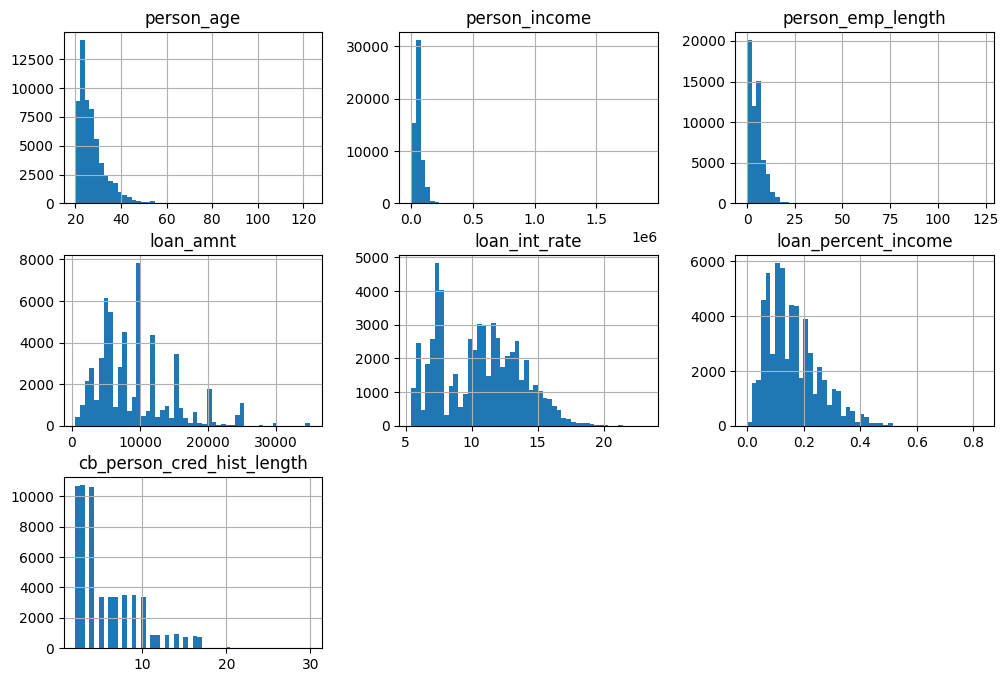

In [13]:
X_train[numerical_feature_set].hist(bins=50, figsize=(12, 8))
plt.show()

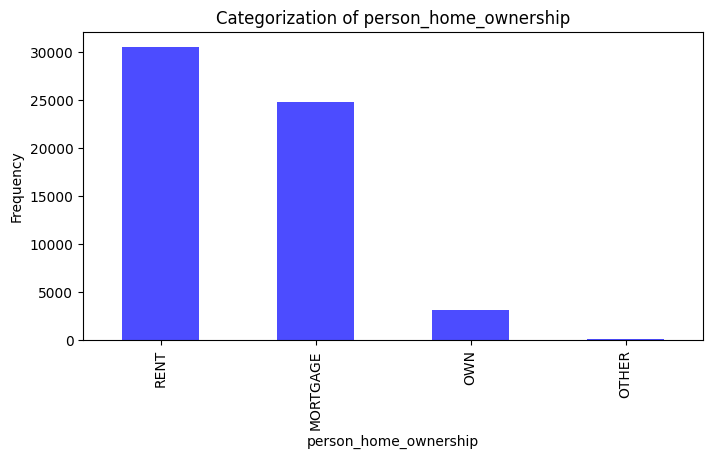

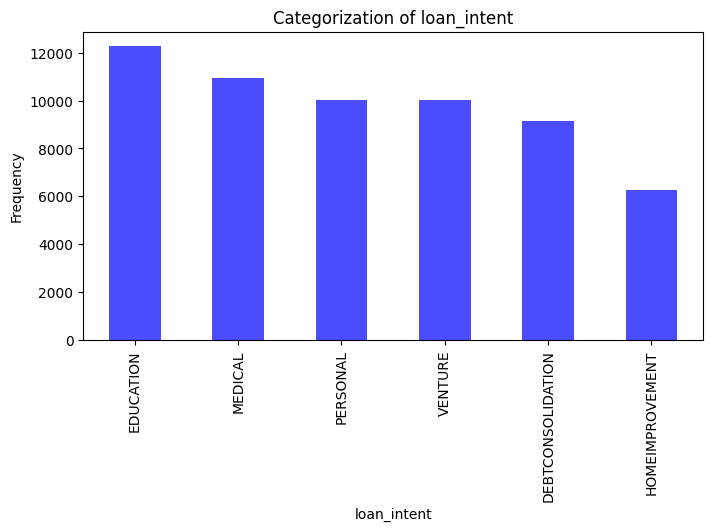

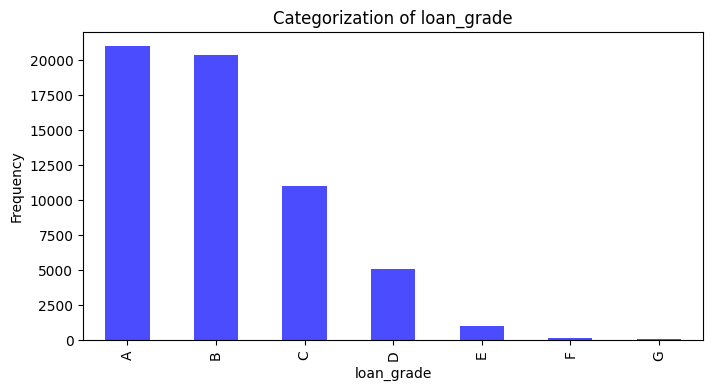

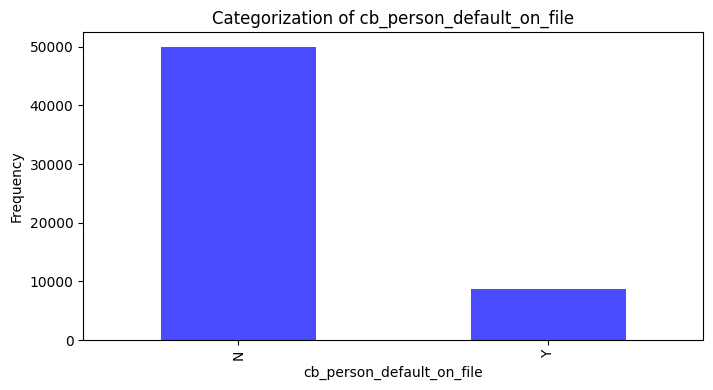

In [15]:
for categorical_feature in categorical_feature_set:
  plt.figure(figsize=(8, 4))
  training_data[categorical_feature].value_counts().plot(kind='bar', color='blue', alpha=0.7)
  plt.title(f'Categorization of {categorical_feature}')
  plt.xlabel(categorical_feature)
  plt.ylabel('Frequency')
  plt.show()

In [21]:
corr_matrix = X_train.corr(numeric_only=True)
corr_matrix

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
id,1.000000,0.008608,-0.001896,0.005376,-0.000403,-0.003454,-0.002677,0.008139
person_age,0.008608,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260
person_income,-0.001896,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727
person_emp_length,0.005376,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842
loan_amnt,-0.000403,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720
loan_int_rate,-0.003454,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535
loan_percent_income,-0.002677,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202
cb_person_cred_hist_length,0.008139,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000


In [16]:
oneHotEncoding_columns = [x for x in categorical_feature_set if x != 'loan_grade']

In [17]:
columns_to_scale = ['person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [18]:
def perform_encoding(X_train, X_val):

  label_encoder = LabelEncoder()
  label_encoder.fit(X_train['loan_grade'])

  X_train.loc[:, 'loan_grade'] = label_encoder.transform(X_train['loan_grade'])
  X_val.loc[:, 'loan_grade'] = label_encoder.transform(X_val['loan_grade'])

  for column in oneHotEncoding_columns:

    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoder.fit(X_train[[column]])

    column_names = [f'{column}_{category}' for category in onehot_encoder.categories_[0]]

    one_hot_encoded_train = onehot_encoder.transform(X_train[[column]])
    one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=column_names)
    X_train = pd.concat([X_train.reset_index(drop=True), one_hot_encoded_train_df.reset_index(drop=True)], axis=1)

    # Transforming the validation set using the same encoder
    one_hot_encoded_val = onehot_encoder.transform(X_val[[column]])
    one_hot_encoded_val_df = pd.DataFrame(one_hot_encoded_val, columns=column_names)

    X_val = pd.concat([X_val.reset_index(drop=True), one_hot_encoded_val_df.reset_index(drop=True)], axis=1)

  X_train.drop(columns=oneHotEncoding_columns, inplace=True)
  X_val.drop(columns=oneHotEncoding_columns, inplace=True)

  return X_train, X_val


In [22]:
def perform_encoding_trees(X_train, X_test, randomForest):

    #print('X_test:\n',X_test)

    label_encoder = LabelEncoder()
    label_encoder.fit(X_train['loan_grade'])

    X_train.loc[:, 'loan_grade'] = label_encoder.transform(X_train['loan_grade'])

    if randomForest:
      X_test.loc[:, 'loan_grade'] = label_encoder.transform(X_test['loan_grade'])

    for column in oneHotEncoding_columns:

      onehot_encoder = OneHotEncoder(sparse_output=False)
      onehot_encoder.fit(X_train[[column]])

      column_names = [f'{column}_{category}' for category in onehot_encoder.categories_[0]]

      one_hot_encoded_train = onehot_encoder.transform(X_train[[column]])
      one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=column_names)
      X_train = pd.concat([X_train.reset_index(drop=True), one_hot_encoded_train_df.reset_index(drop=True)], axis=1)

      if randomForest:
        one_hot_encoded_test = onehot_encoder.transform(X_test[[column]])
        one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=column_names)

        X_test = pd.concat([X_test.reset_index(drop=True), one_hot_encoded_test_df.reset_index(drop=True)], axis=1)

    X_train.drop(columns=oneHotEncoding_columns, inplace=True)

    if randomForest:
      X_test.drop(columns=oneHotEncoding_columns, inplace=True)

    return X_train, X_test

In [23]:
def perform_scaling(X_train, X_val):
    scaler = StandardScaler()

    scaler.fit(X_train[columns_to_scale])
    #X_train_scaled = scaler.transform(X_train)

    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()

    X_train_scaled[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
    X_val_scaled[columns_to_scale] = scaler.transform(X_val[columns_to_scale])

    #X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
    X_train[columns_to_scale] = X_train_scaled[columns_to_scale]
    X_val[columns_to_scale] = X_val_scaled[columns_to_scale]

    return X_train, X_val

In [24]:
def developLogisticModel(X_train_fold, X_val_fold, y_train_fold, y_val_fold, total_logistic_AUC, total_logistic_accuracy, total_logistic_precision, total_logistic_recall):

    X_train_encoded, X_val_encoded = perform_encoding(X_train_fold, X_val_fold)

    X_train_scaled, X_val_scaled = perform_scaling(X_train_encoded, X_val_encoded)

    log_reg = LogisticRegression(max_iter=10000)

    log_reg.fit(X_train_scaled, y_train_fold.to_numpy().ravel())

    y_pred = log_reg.predict(X_val_scaled)

    y_pred_proba = log_reg.predict_proba(X_val_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_proba)

    logiostic_roc_auc  = auc(fpr, tpr)
    print(f"AUC on a Logistic Model for fold {i}: {logiostic_roc_auc*1:.2f}")

    logistic_accuracy = accuracy_score(y_val_fold, y_pred)
    print(f"Accuracy on a Logistic Model for fold {i}: {logistic_accuracy*100:.2f}%")

    logistic_precision = precision_score(y_val_fold, y_pred, average='weighted')
    print(f"Precision on a Logistic Model for fold {i}: {logistic_precision*100:.2f}")

    logistic_recall = recall_score(y_val_fold, y_pred, average='weighted')
    print(f"Recall on a Logistic Model for fold {i}: {logistic_recall*100:.2f}")

    total_logistic_AUC += logiostic_roc_auc
    total_logistic_accuracy += logistic_accuracy
    total_logistic_precision += logistic_precision
    total_logistic_recall += logistic_recall

    return total_logistic_AUC, total_logistic_accuracy, total_logistic_precision, total_logistic_recall


In [25]:
def developKNNModel(X_train_fold, X_val_fold, y_train_fold, y_val_fold, total_KNN_AUC, total_KNN_accuracy, total_KNN_precision, total_KNN_recall):

    model_roc_auc = 0.0
    best_roc_auc = 0.0

    best_model_accuracy = 0.0
    best_model_precision = 0.0
    best_model_recall = 0.0

    X_train_encoded, X_val_encoded = perform_encoding(X_train_fold, X_val_fold)

    X_train_scaled, X_val_scaled = perform_scaling(X_train_encoded, X_val_encoded)

    neighbors_range = [3, 5, 7]
    best_k = neighbors_range[0]

    for k in neighbors_range:
      # Check variability in y_val_fold for the current fold
      #print("Unique values in y_val_fold:", np.unique(y_val_fold))
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_scaled, y_train_fold.to_numpy().ravel())
      y_pred_knn = knn.predict(X_val_scaled)

      #y_pred_proba = knn.predict_proba(X_val_scaled)[:, 1]
      y_pred_proba_full = knn.predict_proba(X_val_scaled)

      # Check that y_pred_proba is producing probabilities
      #print("Sample of predicted probabilities:", y_pred_proba[:25])

      #fpr, tpr, _ = roc_curve(y_val_fold, y_pred_proba)
      #model_roc_auc  = auc(fpr, tpr)

      model_roc_auc = roc_auc_score(y_val_fold, y_pred_proba_full[:, 1])

      model_accuracy = accuracy_score(y_val_fold, y_pred_knn)
      model_precision = precision_score(y_val_fold, y_pred_knn, average='weighted', zero_division=0)
      model_recall = recall_score(y_val_fold, y_pred_knn, average='weighted')
      #print(f"Accuracy for {k} neighbors: {model_accuracy*100:.2f}%")

      if model_roc_auc > best_roc_auc:
        best_roc_auc = model_roc_auc
        best_k = k

        best_model_accuracy = model_accuracy
        best_model_precision = model_precision
        best_model_recall = model_recall

    print(f"Model with {best_k} neighbors is the best KNN model for Fold {i} with AUC: {best_roc_auc:.2f}")
    print(f"Accuracy of the best model: {best_model_accuracy*100:.2f}%")
    print(f"Precision of the best model: {best_model_precision*100:.2f}")
    print(f"Recall of the best model: {best_model_recall*100:.2f}")

    total_KNN_AUC += best_roc_auc
    total_KNN_accuracy += best_model_accuracy
    total_KNN_precision += best_model_precision
    total_KNN_recall += best_model_recall

    return total_KNN_AUC, total_KNN_accuracy, total_KNN_precision, total_KNN_recall


In [26]:
def developDecisionTree(X_train, y_train, X_test):

  param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
  }

  X_encoded, X_test = perform_encoding_trees(X_train, X_test, False)

  scoring = {'accuracy': 'accuracy', 'precision': make_scorer(precision_score, average='weighted', zero_division=0),
            'recall': make_scorer(recall_score, average='weighted'),
            'roc_auc': 'roc_auc'}

  grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring=scoring, refit='roc_auc')

  grid_search.fit(X_encoded, y_train)

  # Print best hyperparameters
  print("Best parameters for a Decision Tree:", grid_search.best_params_)
  print("Best cross-validation ROC AUC for a Decision Tree:", grid_search.best_score_)
  print("Best cross-validation accuracy for a Decision Tree:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
  print("Best cross-validation precision for a Decision Tree:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
  print("Best cross-validation recall for a Decision Tree:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

  # Train final model on the full training data with the best parameters
  # best_tree = grid_search.best_estimator_
  # best_tree.fit(X_train, y_train)


In [27]:
def developRandomForest(X_train, y_train, X_test):

    param_grid = {
    'max_depth': [10, 20, 25, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
    }

    X_train_encoded, X_test_encoded = perform_encoding_trees(X_train, X_test, True)

    scoring = {'accuracy': 'accuracy', 'precision': make_scorer(precision_score, average='weighted', zero_division=0),
              'recall': make_scorer(recall_score, average='weighted'),
               'roc_auc': 'roc_auc'
               }

    grid_search_random = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=scoring, refit='roc_auc')

    grid_search_random.fit(X_train_encoded, y_train.to_numpy().ravel())

    print("Best parameters for a Random Forest Classifier:", grid_search_random.best_params_)
    print("Best cross-validation ROC AUC for a Random Forest Classifier:", grid_search_random.best_score_)
    print("Best cross-validation accuracy for a Random Forest Classifier:", grid_search_random.cv_results_['mean_test_accuracy'][grid_search_random.best_index_])
    print("Best cross-validation precision for a Random Forest Classifier:", grid_search_random.cv_results_['mean_test_precision'][grid_search_random.best_index_])
    print("Best cross-validation recall for a Random Forest Classifier:", grid_search_random.cv_results_['mean_test_recall'][grid_search_random.best_index_])

    return grid_search_random, X_train_encoded, X_test_encoded

In [ ]:
splits = 5
kf = KFold(n_splits=splits)

i = 1
total_logistic_AUC = 0
total_logistic_accuracy = 0
total_logistic_precision = 0
total_logistic_recall = 0

total_KNN_AUC = 0.0
total_KNN_accuracy = 0.0
total_KNN_precision = 0.0
total_KNN_recall = 0.0

for train_index, val_index in kf.split(X_train):
    #print('train index: ',train_index)
    #print('val index: ',val_index)

    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    total_logistic_AUC, total_logistic_accuracy, total_logistic_precision, total_logistic_recall = developLogisticModel(X_train_fold, X_val_fold, y_train_fold, y_val_fold, total_logistic_AUC, total_logistic_accuracy, total_logistic_precision, total_logistic_recall)
    print("\n")

    total_KNN_AUC, total_KNN_accuracy, total_KNN_precision, total_KNN_recall = developKNNModel(X_train_fold, X_val_fold, y_train_fold, y_val_fold, total_KNN_AUC, total_KNN_accuracy, total_KNN_precision, total_KNN_recall)
    print("\n")

    i += 1

average_logistic_auc = total_logistic_AUC/splits
average_logistic_accuarcy = (total_logistic_accuracy*100)/splits
average_logistic_precision = (total_logistic_precision*100)/splits
average_logistic_recall = (total_logistic_recall*100)/splits

print(f"Average AUC of the Logistic model: {average_logistic_auc:.2f}")
print(f"Average accuracy of the Logistic model: {average_logistic_accuarcy:.2f}%")
print(f"Average precision of the Logistic model: {average_logistic_precision:.2f}")
print(f"Average recall of the Logistic model: {average_logistic_recall:.2f}")

average_KNN_AUC = total_KNN_AUC
average_KNN_accuracy = (total_KNN_accuracy*100)/splits
average_KNN_precision = (total_KNN_precision*100)/splits
average_KNN_recall = (total_KNN_recall*100)/splits

print("\n")
print(f"Average AUC of the KNN model: {average_KNN_AUC:.2f}")
print(f"Average accuracy of the KNN model: {average_KNN_accuracy:.2f}%")
print(f"Average precision of the KNN model: {average_KNN_precision:.2f}")
print(f"Average recall of the KNN model: {average_KNN_recall:.2f}")



AUC on a Logistic Model for fold 1: 0.89
Accuracy on a Logistic Model for fold 1: 89.94%
Precision on a Logistic Model for fold 1: 89.05
Recall on a Logistic Model for fold 1: 89.94


Model with 3 neighbors is the best KNN model for Fold 1 with AUC: 0.50
Accuracy of the best model: 85.29%
Precision of the best model: 72.75
Recall of the best model: 85.29


AUC on a Logistic Model for fold 2: 0.89
Accuracy on a Logistic Model for fold 2: 89.88%
Precision on a Logistic Model for fold 2: 88.91
Recall on a Logistic Model for fold 2: 89.88


Model with 7 neighbors is the best KNN model for Fold 2 with AUC: 0.50
Accuracy of the best model: 85.71%
Precision of the best model: 73.46
Recall of the best model: 85.71


AUC on a Logistic Model for fold 3: 0.90
Accuracy on a Logistic Model for fold 3: 90.31%
Precision on a Logistic Model for fold 3: 89.45
Recall on a Logistic Model for fold 3: 90.31


Model with 3 neighbors is the best KNN model for Fold 3 with AUC: 0.50
Accuracy of the best model:

In [ ]:
def trainSelectedRandomForestModel(grid_search_random, X_train_encoded, y_train):
  best_params = grid_search_random.best_params_
  final_model = RandomForestClassifier(**best_params)
  final_model.fit(X_train_encoded, y_train.to_numpy().ravel())

  return final_model


In [ ]:
def performPrediction(final_model, X_test):

  #best_model = final_model.best_estimator_
  #y_test_pred = final_model.predict(X_test)

  y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

  ids = X_test['id']

  prediction_results = pd.DataFrame({
        'id': ids,
        'loan_status': y_test_pred_proba
    })

  prediction_results.to_csv('PredictionProbabilities_RandomForest.csv', index=False)
  print("\nPrediction results saved to a csv file")


In [ ]:
X_train = training_data.iloc[:,0:12]
y_train = training_data.iloc[:,[12]]
grid_search_Decision, X_train_Decision, X_test_Decision = developDecisionTree(X_train, y_train, X_test)

Best parameters for a Decision Tree: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation ROC AUC for a Decision Tree: 0.9009521964124241
Best cross-validation accuracy for a Decision Tree: 0.931980561002643
Best cross-validation precision for a Decision Tree: 0.9295300873056931
Best cross-validation recall for a Decision Tree: 0.931980561002643


In [ ]:
X_train = training_data.iloc[:,0:12]
y_train = training_data.iloc[:,[12]]
grid_search_random, X_train_encoded, X_test_encoded = developRandomForest(X_train, y_train, X_test)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for a Random Forest Classifier: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation ROC AUC for a Random Forest Classifier: 0.9293240301383514
Best cross-validation accuracy for a Random Forest Classifier: 0.9401824537471224
Best cross-validation precision for a Random Forest Classifier: 0.9433632315301305
Best cross-validation recall for a Random Forest Classifier: 0.9401824537471224


In [ ]:
# Random Forest Classifier is the best model with accuracy of ~94% as well as precision and recall of ~94
final_model = trainSelectedRandomForestModel(grid_search_random, X_train_encoded, y_train) # training random forest model on the entire training data

In [ ]:
performPrediction(final_model, X_test_encoded)


Prediction results saved to a csv file
